#### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

#### Data Preprocessing

In [2]:
df = pd.read_csv('Data/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
#Converting the Year Columns
Age = []
for i in df['Year']:
    Age.append(2019-i)
df.insert(2, 'Age', Age)
df.drop(columns=['Car_Name', 'Year'],inplace=True)

In [4]:
#Converting Categorical Variables
data = {
    'Fuel_Type': df['Fuel_Type'].value_counts(),
    'Seller_Type': df['Seller_Type'].value_counts(),
    'Transmission': df['Transmission'].value_counts(),
    'Owner': df['Owner'].value_counts()
}

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
categorical_attr = ['Fuel_Type', 'Seller_Type', 'Transmission']
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)
df.insert(8, 'Fuel_Type_n', df.Fuel_Type+2)
df.drop(columns=['Fuel_Type'],inplace=True)
df.insert(8, 'Seller_Type_n', df.Seller_Type+2)
df.drop(columns=['Seller_Type'],inplace=True)
df.insert(8, 'Transmission_n', df.Transmission+2)
df.drop(columns=['Transmission'],inplace=True)
df.insert(8, 'Owner_n', df.Owner+2)
df.drop(columns=['Owner'],inplace=True)
df

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_n,Seller_Type_n,Transmission_n,Owner_n
0,5,3.35,5.59,27000,4,2,3,2
1,6,4.75,9.54,43000,3,2,3,2
2,2,7.25,9.85,6900,4,2,3,2
3,8,2.85,4.15,5200,4,2,3,2
4,5,4.60,6.87,42450,3,2,3,2
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,3,2,3,2
297,4,4.00,5.90,60000,4,2,3,2
298,10,3.35,11.00,87934,4,2,3,2
299,2,11.50,12.50,9000,3,2,3,2


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,301.0,5.372093,2.891554,1.00,3.0,5.0,7.0,16.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Fuel_Type_n,301.0,3.787375,0.425801,2.00,4.0,4.0,4.0,4.0
Seller_Type_n,301.0,2.352159,0.478439,2.00,2.0,2.0,3.0,3.0
Transmission_n,301.0,2.867110,0.340021,2.00,3.0,3.0,3.0,3.0
Owner_n,301.0,2.043189,0.247915,2.00,2.0,2.0,2.0,5.0


 #### Data Visualization

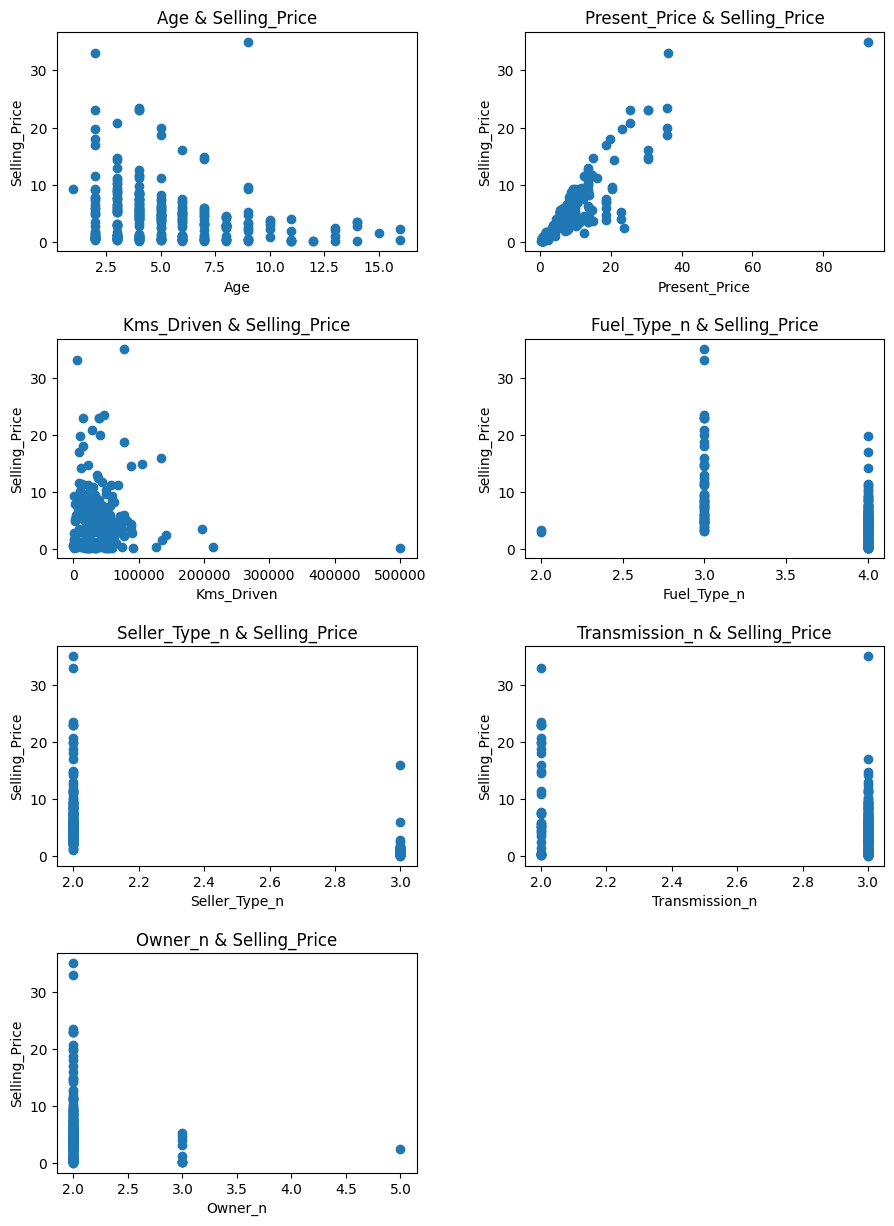

In [6]:
variables = ['Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type_n', 'Seller_Type_n', 'Transmission_n', 'Owner_n']
num_plots = len(variables)
num_rows = 4
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(9, 12))
fig.tight_layout()
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].scatter(df[var], df['Selling_Price'])
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Selling_Price')
    axs[row, col].set_title(f'{var} & Selling_Price')
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()